<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Rolling Statistics


# Independent Practice

**Instructor Note:** These are optional and can be assigned as student practice questions outside of class.

### 1) Load the Unemployment data set. Perform any necessary cleaning and preprocess the data by creating a `period` index.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
u = pd.read_csv('../data/unemployment.csv')
u.head()

,date,unemployment_rate
0,1948Q1,3.733
1,1948Q2,3.667
2,1948Q3,3.767
3,1948Q4,3.833
4,1949Q1,4.667


In [3]:
u.dtypes

date                  object
unemployment_rate    float64
dtype: object

In [4]:
# This is quarterly data, so converting to datetime is a bit complicated.
# First, convert the date column to a datetime object.
# Then, place that datetime object into the index.
# Finally, convert the datetime index to a period index by using
# Series.to_period() with a freq kwarg of 'Q', for quarterly.
# See here for details: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.to_period.html
# It is VERY important to note that Series.to_period() returns an index,
# it does NOT re-set the index. This must be done manually.
# Finally, the original 'date' column is dropped to keep the df tidy.
u.set_index(pd.to_datetime(u['date']), inplace=True)
u.index = u.to_period(freq='Q').index
u.drop(labels='date', axis=1, inplace=True)
u.head()

,unemployment_rate
date,
1948Q1,3.733
1948Q2,3.667
1948Q3,3.767
1948Q4,3.833
1949Q1,4.667


In [5]:
u.index.freq

<QuarterEnd: startingMonth=12>

In [6]:
u.dtypes

unemployment_rate    float64
dtype: object

### 2) Plot the unemployment rate.

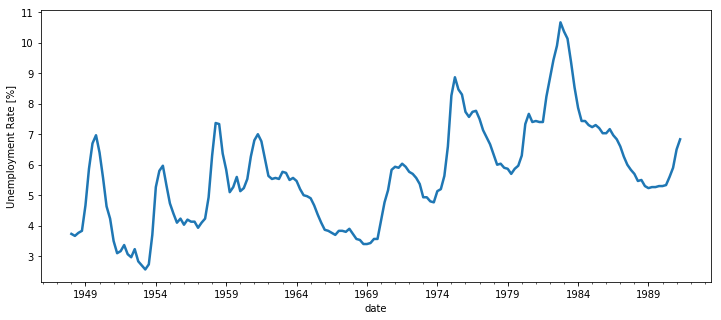

In [7]:
u['unemployment_rate'].plot(lw=2.5, figsize=(12,5))
plt.ylabel('Unemployment Rate [%]')
plt.show();

### 3) Calculate the rolling mean of years with `window=3 `, without centering, and plot both the unemployment rates and the rolling mean data.

In [8]:
yearly = u['unemployment_rate'].resample('A').mean().rolling(window=3, center=False).mean()
yearly.head()

date
1948         NaN
1949         NaN
1950    5.002833
1951    4.847333
1952    3.838917
Freq: A-DEC, Name: unemployment_rate, dtype: float64

In [9]:
# Extract the dates from the index as timestamps.
date_ticks_orig = u.index.to_timestamp()
date_ticks_roll = yearly.index.to_timestamp()

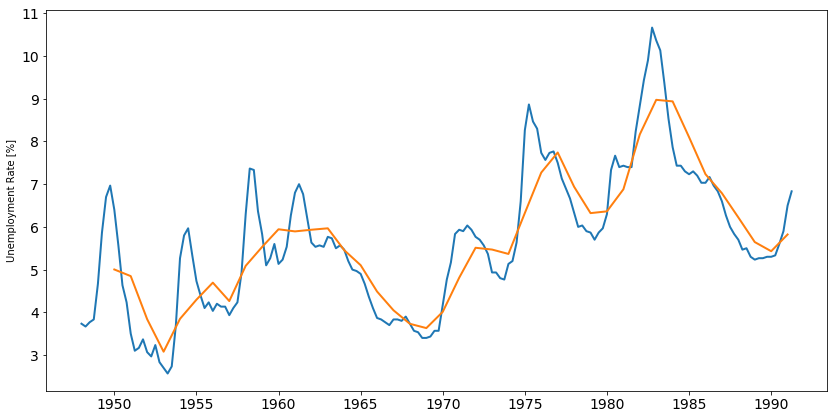

In [10]:
plt.figure(figsize=(14,7))
plt.plot(date_ticks_orig, u['unemployment_rate'],lw=2)
plt.plot(date_ticks_roll, yearly.values, lw=2)
plt.tick_params(labelsize=14)
plt.ylabel('Unemployment Rate [%]')
plt.show();

### 4) Calculate the rolling median with `window=5` and `window=15`. Plot both together with the original data.

In [11]:
uroll_w5 = u['unemployment_rate'].rolling(window=5).median()
uroll_w15 = u['unemployment_rate'].rolling(window=15).median()

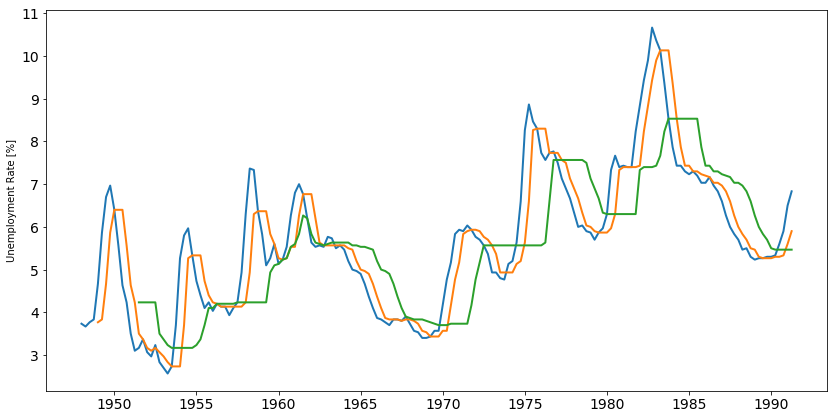

In [12]:
plt.figure(figsize=(14,7))
plt.plot(date_ticks_orig, u['unemployment_rate'],lw=2)
plt.plot(date_ticks_orig, uroll_w5, lw=2)
plt.plot(date_ticks_orig, uroll_w15, lw=2)
plt.ylabel('Unemployment Rate [%]')
plt.tick_params(labelsize=14)
plt.show();

### 5) Calculate and plot the expanding mean. Resample by quarter. Plot the rolling mean and the expanding mean together.

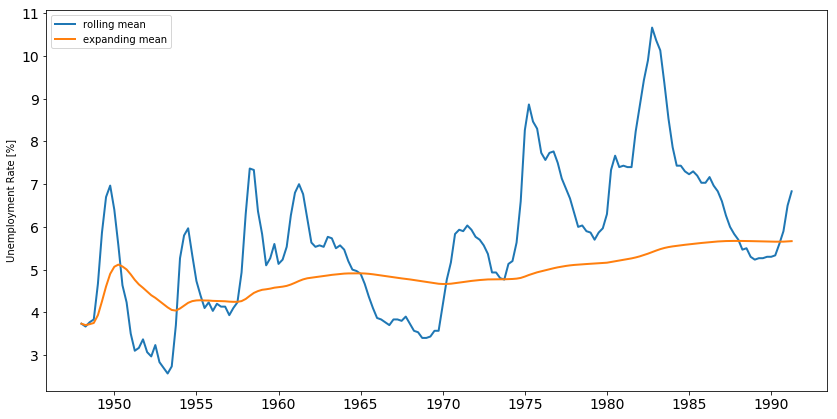

In [13]:
date_ticks = u.index.to_timestamp()
rolling_mean = u['unemployment_rate'].resample('Q').sum().rolling(window=1, center=False).mean()
expanding_mean = u['unemployment_rate'].resample('Q').sum().expanding().mean()
plt.figure(figsize=(14,7))
plt.plot(date_ticks, rolling_mean, alpha=1, lw=2, label='rolling mean')
plt.plot(date_ticks, expanding_mean, alpha=1, lw=2, label='expanding mean')
plt.legend(loc='upper left')
plt.tick_params(labelsize=14)
plt.ylabel('Unemployment Rate [%]')
plt.show();

### 6) Calculate and plot the exponentially weighted sum along with the rolling sum.

In [14]:
rolling_mean = u['unemployment_rate'].resample('Q').sum().rolling(window=2, center=True).mean()
exp_weighted_mean = u['unemployment_rate'].resample('Q').sum().ewm(span=10).mean()

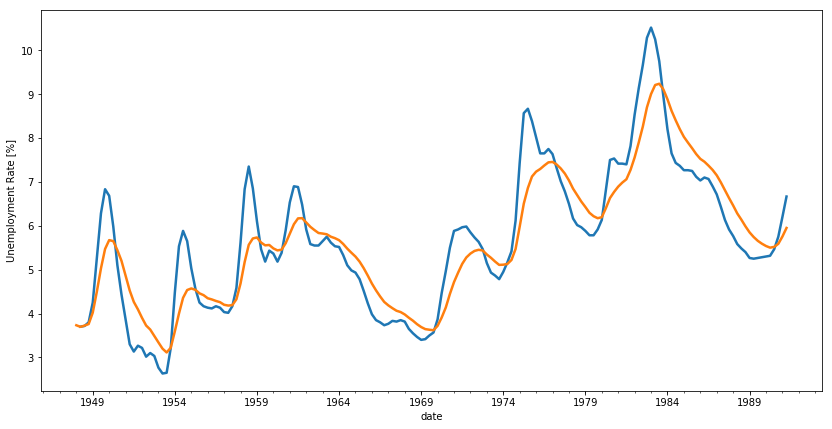

In [15]:
ax = rolling_mean.plot(lw=2.5, figsize=(14,7))
exp_weighted_mean.plot(ax=ax, lw=2.5)
plt.ylabel('Unemployment Rate [%]')
plt.show();

### 7) Difference the unemployment rate and plot.

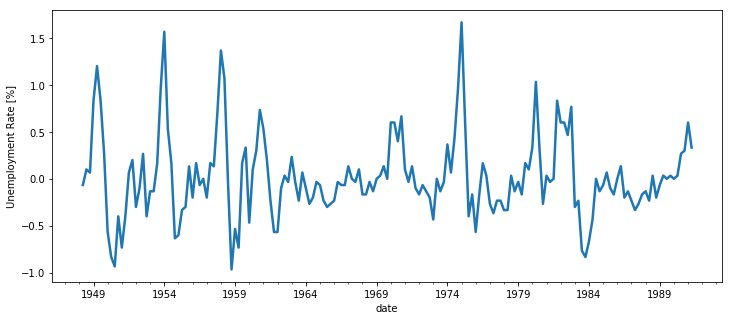

In [16]:
u['unemp_diff'] = u['unemployment_rate'].diff()
u['unemp_diff'].plot(lw=2.5, figsize=(12,5))
plt.ylabel('Unemployment Rate [%]')
plt.show();